In [2]:
alpha = ["0.55","0.60",'0.65',"0.70","0.75","0.80","0.85","0.90","0.95","1.0"]

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk

In [40]:
def makeCDF(imgArray, alpha = 0):#imgArrayList:int64
    imgArray =  imgArray + 1024 
    
    imgArray = np.where(imgArray<0, 0, imgArray) 
    imgArray = np.where(imgArray>2048, 2048,imgArray) 
    
    ctRange = 2048 + 1
    #uniformDistribution = np.array([ctRange]*ctRange)
    
    HIST = np.array([0.0]*ctRange)
    
    HIST, _  = np.histogram(imgArray.flatten(), ctRange, [0, 2048+1])
       
    
    
    print(HIST)
    HIST = HIST / HIST.sum()
    HIST = HIST * (1 - alpha) + alpha / 2048
    print(HIST)
    cdf = HIST.cumsum()
    cdf_m = np.ma.masked_equal(cdf,0)
    temp = (cdf_m - cdf_m.min())/(cdf_m.max()-cdf_m.min())
    cdf_m = 2048*temp
    cdf = np.ma.filled(cdf_m,0).astype('int64')
    
    return cdf, imgArray

def equalizingHistogram(imgArary, alpha):
    cdf, imgArray = makeCDF(imgArray, alpha)
    
    eqimgArary = cdf[imgArray] - 1024
        
    
    return eqimgArary

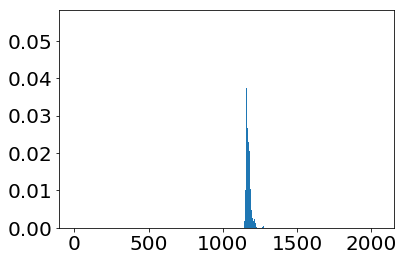

In [44]:
img = sitk.ReadImage("/Users/tanimotoryou/Downloads/histeq_numpy1.jpg")
imgArray = sitk.GetArrayFromImage(img)

imgArray = np.array(imgArray + 1024, dtype=np.int64)
plt.hist(imgArray.flatten(), 2048, [0,2049], density=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

[    0     0     0 ...    97   112 40472]
[0.         0.         0.         ... 0.0014801  0.00170898 0.61755371]


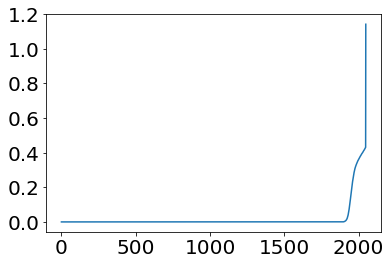

In [43]:
cdf, _= makeCDF(imgArray)
cdf = cdf / imgArray.max()
plt.plot(cdf)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

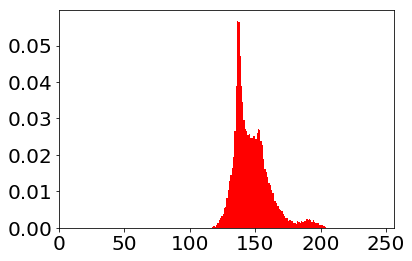

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/Users/tanimotoryou/Downloads/histeq_numpy1.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()


plt.hist(img.flatten(),256,[0,256], color = 'r', density=True)
plt.xlim([0,256])
#plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

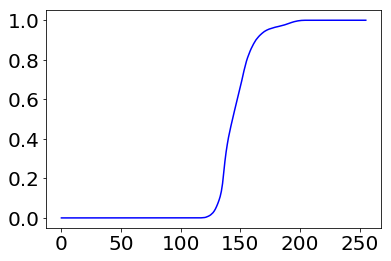

In [18]:
cdf_normalized = cdf / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

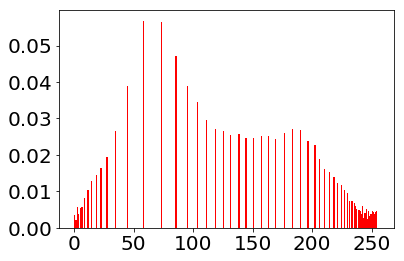

In [19]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
plt.hist(img2.flatten(),256,[0,256], color = 'r', density=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

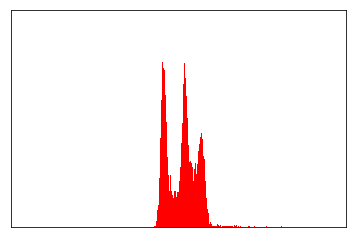

In [35]:
img = sitk.ReadImage("/Users/tanimotoryou/Documents/Documents/lab/program/test/1_0.mha")
imgArray = sitk.GetArrayFromImage(img)
plt.hist(imgArray.flatten(), 2048, [-1024,1024], color="r")
plt.xticks([])
plt.yticks([])
plt.show()

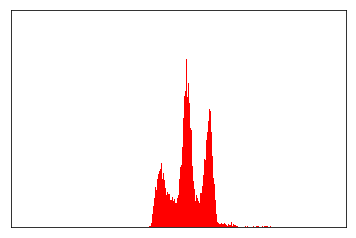

In [48]:
img = sitk.ReadImage("/Users/tanimotoryou/Documents/Documents/lab/program/test/image1_16.mha")
imgArray = sitk.GetArrayFromImage(img)
plt.hist(imgArray.flatten(), 2048, [-1024,1024], color="r")
plt.xticks([])
plt.yticks([])
plt.show()

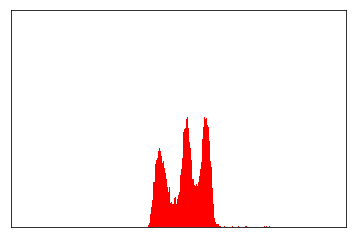

In [47]:
img = sitk.ReadImage("/Users/tanimotoryou/Documents/Documents/lab/program/test/image0_16.mha")
imgArray = sitk.GetArrayFromImage(img)
plt.hist(imgArray.flatten(), 2048, [-1024,1024], color="r")
plt.xticks([])
plt.yticks([])
plt.show()

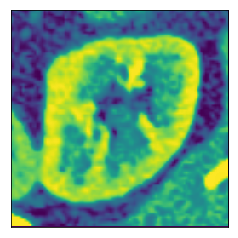

In [41]:
img = sitk.ReadImage("/Users/tanimotoryou/Documents/Documents/lab/program/test/0_0.mha")
imgArray = sitk.GetArrayFromImage(img)
plt.imshow(imgArray)
plt.xticks([])
plt.yticks([])
plt.show()

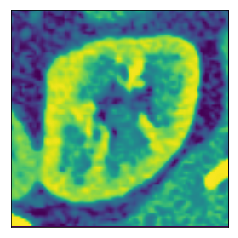

In [42]:
img = sitk.ReadImage("/Users/tanimotoryou/Documents/Documents/lab/program/test/0_05.mha")
imgArray = sitk.GetArrayFromImage(img)
plt.imshow(imgArray)
plt.xticks([])
plt.yticks([])
plt.show()

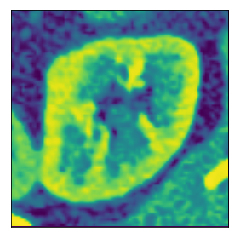

In [43]:
img = sitk.ReadImage("/Users/tanimotoryou/Documents/Documents/lab/program/test/0_10.mha")
imgArray = sitk.GetArrayFromImage(img)
plt.imshow(imgArray)
plt.xticks([])
plt.yticks([])
plt.show()

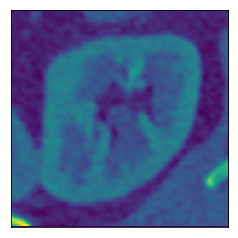

In [44]:
img = sitk.ReadImage("/Users/tanimotoryou/Documents/Documents/lab/program/test/0_95.mha")
imgArray = sitk.GetArrayFromImage(img)
plt.imshow(imgArray)
plt.xticks([])
plt.yticks([])
plt.show()

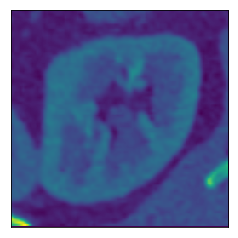

In [46]:
img = sitk.ReadImage("/Users/tanimotoryou/Documents/Documents/lab/program/test/1_0.mha")
imgArray = sitk.GetArrayFromImage(img)
plt.imshow(imgArray)
plt.xticks([])
plt.yticks([])
plt.show()

In [61]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

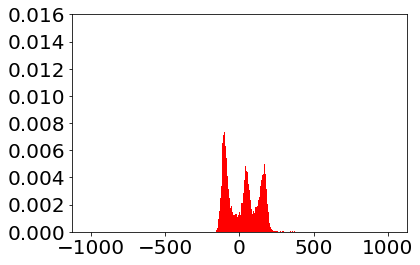

In [89]:
img = sitk.ReadImage("/home/vmlab/Desktop/data/slice/hist_1.0/image/case_00000/image0_25.mha")
imgArray = sitk.GetArrayFromImage(img)
plt.hist(imgArray.flatten(), 2048, [-1024,1024], color="r", density=True)
plt.ylim([0,0.016])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

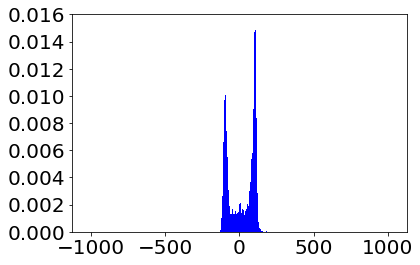

In [90]:
img = sitk.ReadImage("/home/vmlab/Desktop/data/slice/hist_1.0/image/case_00139/image0_25.mha")
imgArray = sitk.GetArrayFromImage(img)
plt.hist(imgArray.flatten(), 2048, [-1024,1024], color="b", density=True)
plt.ylim([0,0.016])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

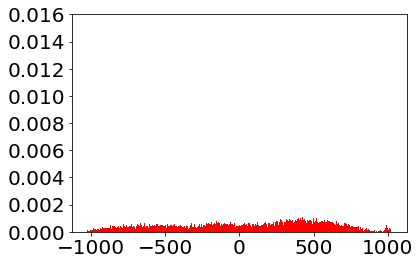

In [69]:
img = sitk.ReadImage("/home/vmlab/Desktop/data/slice/hist_0.0/image/case_00025/image0_13.mha")
imgArray = sitk.GetArrayFromImage(img)
plt.hist(imgArray.flatten(), 2048, [-1024,1024], color="r", density=True)
plt.ylim([0,0.016])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

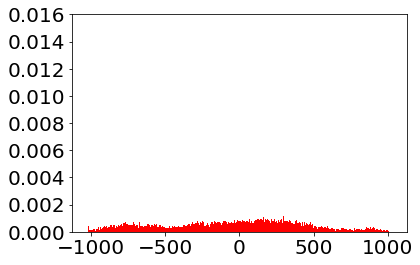

In [71]:
img = sitk.ReadImage("/home/vmlab/Desktop/data/slice/hist_0.0/image/case_00139/image1_25.mha")
imgArray = sitk.GetArrayFromImage(img)
plt.hist(imgArray.flatten(), 2048, [-1024,1024], color="r", density=True)
plt.ylim([0,0.016])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

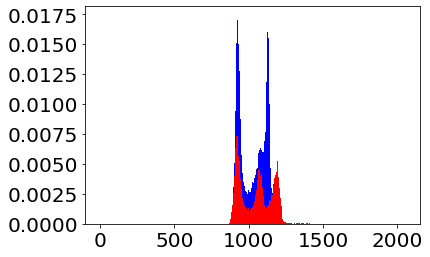

In [91]:
img1 = sitk.ReadImage("/home/vmlab/Desktop/data/slice/hist_1.0/image/case_00000/image0_25.mha")
imgArray1 = sitk.GetArrayFromImage(img1)
img2 = sitk.ReadImage("/home/vmlab/Desktop/data/slice/hist_1.0/image/case_00139/image0_25.mha")
imgArray2 = sitk.GetArrayFromImage(img2)
hist1, _ = np.histogram(imgArray1.flatten(), 2048, [-1024,1024], density=True)
hist2, _ = np.histogram(imgArray2.flatten(), 2048, [-1024,1024], density=True)
plt.bar(np.arange(2048), hist1, width=1, color='r')
plt.bar(np.arange(2048), hist2, width=1, bottom=hist1, color='b')
#plt.ylim([0,0.016])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Make origininal histogram with all of patients added

In [68]:
import SimpleITK as sitk
import numpy as np
from pathlib import Path
import sys
import os

In [6]:
validation = ['134', '046', '021', '038', '044', '070', '179', '006', '204', '152', '190', '084', '118', '047', '200', '101', '148', '050', '110', '032', '078', '025', '016', '142', '168', '111', '182', '041']
training = ['207', '080', '095', '099', '007', '028', '053', '137', '176', '106', '083', '127', '094', '103', '193', '019', '197', '037', '196', '035', '113', '146', '185', '093', '145', '102', '056', '042', '139', '067', '180', '061', '026', '174', '153', '001', '064', '075', '091', '129', '147', '058', '178', '085', '086', '203', '003', '138', '144', '051', '122', '024', '076', '205', '121', '063', '108', '027', '188', '184', '004', '160', '119', '164', '045', '130', '072', '049', '166', '154', '209', '143', '013', '163', '074', '081', '048', '052', '126', '087', '149', '117', '136', '012', '206', '040', '191', '054', '124', '066', '195', '187', '132', '057', '150', '060', '089', '104', '170', '159', '171', '169', '039', '125', '199', '011', '008', '073', '055', '107', '079', '092', '192', '030', '186', '181', '088', '172', '034', '018', '120', '082', '177', '014', '158', '109', '100', '131', '033', '010', '140', '069', '022', '123', '071', '023', '098', '116', '128', '043', '059', '161', '115', '097', '167', '017', '015', '201', '096', '202']
testing = ['173', '002', '068', '133', '155', '114', '090', '105', '112', '175', '183', '208', '029', '065', '157', '162', '141', '062', '031', '156', '189', '135', '020', '077', '000', '009', '198', '036']
ignore = ['005','151','165','194']

In [8]:
savePath = 'orgHist.npy'
ctRange = 2048 + 1
HIST = np.array([0.0] * ctRange)

for x in range(210):
    sx = str(x).zfill(3)
    if sx not in training:
        continue
        
    p = Path('/Volumes/Untitled/slice/hist_1.0/image/case_00' + sx)
    if not p.exists():
        print('File does not exist. ')
        sys.exit()
    for i in p.glob('image*'):
        img = sitk.ReadImage(str(i))
        imgArray = sitk.GetArrayFromImage(img)
        imgArray = imgArray + 1024
        imgArray = np.clip(imgArray, 0, 2048)
        hist, bins = np.histogram(imgArray.ravel(), ctRange, [0, ctRange], density=True)
        HIST += hist
    print('case_00' + sx + ' done. ')
    
HIST = HIST / HIST.sum()
print(HIST)
if np.isnan(HIST).any():
    print('Failed to make histogram')
else:
    print('Suceeded in making histogram, now saving histogram...')
    np.save(savePath, HIST)
    print('Successfully saved to ' + savePath)


case_00001 done. 
case_00003 done. 
case_00004 done. 
case_00007 done. 
case_00008 done. 
case_00010 done. 
case_00011 done. 
case_00012 done. 
case_00013 done. 
case_00014 done. 
case_00015 done. 
case_00017 done. 
case_00018 done. 
case_00019 done. 
case_00022 done. 
case_00023 done. 
case_00024 done. 
case_00026 done. 
case_00027 done. 
case_00028 done. 
case_00030 done. 
case_00033 done. 
case_00034 done. 
case_00035 done. 
case_00037 done. 
case_00039 done. 
case_00040 done. 
case_00042 done. 
case_00043 done. 
case_00045 done. 
case_00048 done. 
case_00049 done. 
case_00051 done. 
case_00052 done. 
case_00053 done. 
case_00054 done. 
case_00055 done. 
case_00056 done. 
case_00057 done. 
case_00058 done. 
case_00059 done. 
case_00060 done. 
case_00061 done. 
case_00063 done. 
case_00064 done. 
case_00066 done. 
case_00067 done. 
case_00069 done. 
case_00071 done. 
case_00072 done. 
case_00073 done. 
case_00074 done. 
case_00075 done. 
case_00076 done. 
case_00079 done. 
case_00080

## Multiply alpha and make CDF

In [35]:
HIST = np.load('orgHist.npy')
print(HIST)

[4.00800867e-05 5.35464036e-06 3.59063825e-06 ... 1.20485102e-06
 1.70250688e-06 1.51414926e-05]


In [36]:
alpha = 1.0
aHIST = HIST * alpha + (1 - alpha) / 2048
cdf = aHIST.cumsum()
print(cdf)
cdf_m = np.ma.masked_equal(cdf,0)
temp = (cdf_m - cdf_m.min())/(cdf_m.max()-cdf_m.min())
cdf_m = 2048*temp
cdf = np.ma.filled(cdf_m,0).astype('int64')
print(cdf)

[4.00800867e-05 4.54347270e-05 4.90253653e-05 ... 9.99983156e-01
 9.99984859e-01 1.00000000e+00]
[   0    0    0 ... 2047 2047 2048]


In [37]:
# def equalizingHistogram(imgArray, hist, alpha):
#     makeCDF(hist, alpha)
def equalizingHistogram(imgArray, cdf):
    x = cdf[imgAr] - 1024
    
    return x

In [70]:
def createParentPath(filepath):
    head, _ = os.path.split(filepath)
    if len(head) != 0:
        os.makedirs(head, exist_ok = True)

In [71]:
def write_file(file_name, text):
    if not os.path.exists(file_name):
        createParentPath(file_name)
        with open(file_name, 'x') as file:
            file.write(text + "\n")

In [82]:
savePath = "/Volumes/Untitled/slice/new"
ctRange = 2048 + 1
##########
#Load original histogram
##########

##########
#make CDF 
##########

#Read CT image and equalizing histogram
for x in range(1):
    sx = str(x).zfill(3)
    if sx in ignore:
        continue
        
    pI = Path('/Volumes/Untitled/slice/hist_1.0/image/case_00' + sx)
    pL = Path('/Volumes/Untitled/slice/hist_1.0/label/case_00' + sx)
    
    if not pI.exists():
        print('File does not exist. ')
        sys.exit()
    
    if not pL.exists():
        print('File does not exist. ')
        sys.exit()
    
    for i,l in zip(pI.iterdir(), pL.iterdir()):
        #Path
        OPI = Path(savePath) / "image" / i.name
        OPL = Path(savePath) / "label" / l.name
        OPT = Path(savePath) / "path" / ("case_00" + sx + ".txt")
        
        #Make parent path
        if not OPI.parent.exists():
            createParentPath(str(OPI))
        
        if not OPL.parent.exists():
            createParentPath(str(OPL))
                             
        print(str(OPL) + "\t" + str(OPI))
        
        ctImg = sitk.ReadImage(str(i))
        ctImgArray = sitk.GetArrayFromImage(ctImg)
        ctImgArray = ctImgArray + 1024
        ctImgArray = np.clip(ctImgArray, 0, 2048)
        
        #Equalizing histogram
        ctImgArray = cdf[ctImgArray] - 1024
        
        #Save ct image
        ctImgNew = sitk.GetImageFromArray(ctImgArray)
        ctImgNew.SetOrigin(ctImg.GetOrigin())
        ctImgNew.SetSpacing(ctImg.GetSpacing())
        ctImgNew.SetDirection(ctImg.GetDirection())
        
        sitk.WriteImage(ctImgNew, str(OPI))
        
        #Save label image
        labImg = sitk.ReadImage(str(l))
        sitk.WriteImage(labImg, str(OPL), True)
        
        #Save textfile
        
        write_file(str(OPT), str(OPL) + "\t" + str(OPI))
        

/Volumes/Untitled/slice/new/label/label0_00.mha	/Volumes/Untitled/slice/new/image/image0_00.mha
/Volumes/Untitled/slice/new/label/label0_01.mha	/Volumes/Untitled/slice/new/image/image0_01.mha
/Volumes/Untitled/slice/new/label/label0_02.mha	/Volumes/Untitled/slice/new/image/image0_02.mha
/Volumes/Untitled/slice/new/label/label0_03.mha	/Volumes/Untitled/slice/new/image/image0_03.mha
/Volumes/Untitled/slice/new/label/label0_04.mha	/Volumes/Untitled/slice/new/image/image0_04.mha
/Volumes/Untitled/slice/new/label/label0_05.mha	/Volumes/Untitled/slice/new/image/image0_05.mha
/Volumes/Untitled/slice/new/label/label0_06.mha	/Volumes/Untitled/slice/new/image/image0_06.mha
/Volumes/Untitled/slice/new/label/label0_07.mha	/Volumes/Untitled/slice/new/image/image0_07.mha
/Volumes/Untitled/slice/new/label/label0_08.mha	/Volumes/Untitled/slice/new/image/image0_08.mha
/Volumes/Untitled/slice/new/label/label0_09.mha	/Volumes/Untitled/slice/new/image/image0_09.mha
/Volumes/Untitled/slice/new/label/label0

In [7]:
import os
import matplotlib.pyplot as plt
from functions import outputMedium, outputMax, caluculateAVG
import math
import numpy as np

result/hist_0.0_0.txt
result/hist_0.0_1.txt
result/hist_0.0_2.txt
result/hist_0.0_3.txt
[0.599326635649762, 0.6104864137518508, 0.6372100652320972, 0.5984949909714408]
result/hist_0.20_0.txt
result/hist_0.20_1.txt
result/hist_0.20_2.txt
result/hist_0.20_3.txt
[0.6120677090083692, 0.6041267003008634, 0.6219687990911092, 0.6389456829046525]
result/hist_0.40_0.txt
result/hist_0.40_1.txt
result/hist_0.40_2.txt
result/hist_0.40_3.txt
[0.6147109223457263, 0.6347534083052123, 0.6187074631382964, 0.6125397280533024]
result/hist_0.60_0.txt
result/hist_0.60_1.txt
result/hist_0.60_2.txt
result/hist_0.60_3.txt
[0.5926663542887347, 0.544743932893256, 0.6097646593949965, 0.6005508916165436]
result/hist_0.80_0.txt
result/hist_0.80_1.txt
result/hist_0.80_2.txt
result/hist_0.80_3.txt
[0.584466393172878, 0.6189791349634556, 0.6276428239819886, 0.6521183955930951]
result/hist_1.0_0.txt
result/hist_1.0_1.txt
result/hist_1.0_2.txt
result/hist_1.0_3.txt
[0.622926626032873, 0.6184626155492349, 0.651159884724

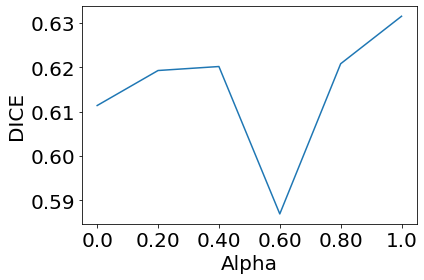

In [7]:
inputPath = 'result/hist_'
alpha = ['0.0', '0.20', '0.40',  '0.60', '0.80', '1.0']

avg = {x:0 for x in alpha}
med = {x:0 for x in alpha}
Max = {x:0 for x in alpha}
results = {x:[] for x in alpha}

for a in alpha:
    for x in range(4):
        path = os.path.expanduser(inputPath) + a + '_' + str(x) + '.txt'
        print(path)
        with open(path) as f:
            l = f.readlines()
            temp = l[-2].split()[-1]
            #print(float(temp))
            
            results[a].append(float(temp))
    print(results[a])
    results[a].sort()

for a in alpha:
    avg[a] = caluculateAVG(results[a])
    med[a] = outputMedium(results[a])
    Max[a] = outputMax(results[a])
    
print("avg : ", avg)
print("med : ", med)
print("max : ", Max)

avgList = []
medList = []
maxList = []
for a in alpha:
    avgList.append(avg[a])
    medList.append(med[a])
    maxList.append(Max[a])
    
print("Avg: ", avgList)
print("Med", medList)
print("Max", maxList)

#fig, axes = plt.subplots(1, 1, figsize=(15,5))
#axes[0].plot(alpha, avgList)
plt.plot(alpha, avgList)
#axes[0].set_title("Average")
#axes[1].plot(alpha, medList)
#axes[1].set_title("Medium")
#axes[2].plot(alpha, maxList)
#axes[2].set_title("Max")
advancedSettings("Alpha", "DICE")
plt.show()

result/summed_0.0_0.txt
result/summed_0.0_1.txt
result/summed_0.0_2.txt
result/summed_0.0_3.txt
result/summed_0.0_4.txt
[0.617873347176423, 0.6186155876361591, 0.6178902833396105, 0.6467592677957479, 0.5651937931339819]
result/summed_0.20_0.txt
result/summed_0.20_1.txt
result/summed_0.20_2.txt
result/summed_0.20_3.txt
result/summed_0.20_4.txt
[0.6156178520951727, 0.6191589922048146, 0.6367796618456106, 0.6469376945304629, 0.6170302515840101]
result/summed_0.40_0.txt
result/summed_0.40_1.txt
result/summed_0.40_2.txt
result/summed_0.40_3.txt
result/summed_0.40_4.txt
[0.6213055703247405, 0.6401852218959275, 0.634066045808568, 0.6315594188912149, 0.6053037446322087]
result/summed_0.60_0.txt
result/summed_0.60_1.txt
result/summed_0.60_2.txt
result/summed_0.60_3.txt
result/summed_0.60_4.txt
[0.5897995543884501, 0.6260112932380941, 0.6145120122021858, 0.6078166063394017, 0.6105173236122495]
result/summed_0.80_0.txt
result/summed_0.80_1.txt
result/summed_0.80_2.txt
result/summed_0.80_3.txt
res

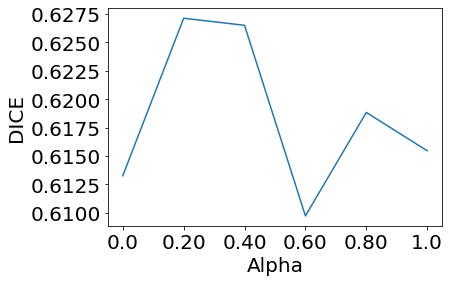

In [5]:
inputPath = 'result/summed_'
alpha = ['0.0', '0.20', '0.40',  '0.60', '0.80', '1.0']

avg = {x:0 for x in alpha}
med = {x:0 for x in alpha}
Max = {x:0 for x in alpha}
results = {x:[] for x in alpha}

for a in alpha:
    for x in range(5):
        path = os.path.expanduser(inputPath) + a + '_' + str(x) + '.txt'
        print(path)
        with open(path) as f:
            l = f.readlines()
            temp = l[-2].split()[-1]
            #print(float(temp))
            
            results[a].append(float(temp))
    print(results[a])
    results[a].sort()

for a in alpha:
    avg[a] = caluculateAVG(results[a])
    med[a] = outputMedium(results[a])
    Max[a] = outputMax(results[a])
    
print("avg : ", avg)
print("med : ", med)
print("max : ", Max)

avgList = []
medList = []
maxList = []
for a in alpha:
    avgList.append(avg[a])
    medList.append(med[a])
    maxList.append(Max[a])
    
print("Avg: ", avgList)
print("Med", medList)
print("Max", maxList)

#fig, axes = plt.subplots(1, 3, figsize=(15,5))
#axes[0].plot(alpha, avgList)
#axes[0].set_title("Average")
plt.plot(alpha, avgList)
advancedSettings("Alpha", "DICE")


#axes[1].plot(alpha, medList)
#axes[1].set_title("Medium")
#axes[2].plot(alpha, maxList)
#axes[2].set_title("Max")

result/summed_float_0.0_0.txt
result/summed_float_0.0_1.txt
result/summed_float_0.0_2.txt
result/summed_float_0.0_3.txt
result/summed_float_0.0_4.txt
[0.5794961129701907, 0.6283209120975061, 0.6206312259282061, 0.6137019779687947, 0.6040149988569901]
result/summed_float_0.20_0.txt
result/summed_float_0.20_1.txt
result/summed_float_0.20_2.txt
result/summed_float_0.20_3.txt
result/summed_float_0.20_4.txt
[0.6153903132298452, 0.6165172020572821, 0.6233439678798589, 0.6339724357288355, 0.6334548359692403]
result/summed_float_0.40_0.txt
result/summed_float_0.40_1.txt
result/summed_float_0.40_2.txt
result/summed_float_0.40_3.txt
result/summed_float_0.40_4.txt
[0.5774784559460633, 0.5935840245687586, 0.5986506620352307, 0.5798087658551728, 0.6377828601725763]
result/summed_float_0.60_0.txt
result/summed_float_0.60_1.txt
result/summed_float_0.60_2.txt
result/summed_float_0.60_3.txt
result/summed_float_0.60_4.txt
[0.6385738059317878, 0.6053239147152326, 0.6010224945399492, 0.6316310814420706, 0

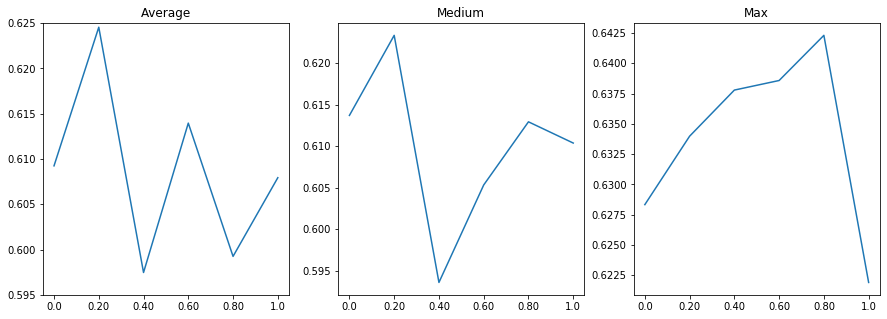

In [5]:
inputPath = 'result/summed_float_'
alpha = ['0.0', '0.20', '0.40',  '0.60', '0.80', '1.0']

avg = {x:0 for x in alpha}
med = {x:0 for x in alpha}
Max = {x:0 for x in alpha}
results = {x:[] for x in alpha}

for a in alpha:
    for x in range(5):
        path = os.path.expanduser(inputPath) + a + '_' + str(x) + '.txt'
        print(path)
        with open(path) as f:
            l = f.readlines()
            temp = l[-2].split()[-1]
            #print(float(temp))
            
            results[a].append(float(temp))
    print(results[a])
    results[a].sort()

for a in alpha:
    avg[a] = caluculateAVG(results[a])
    med[a] = outputMedium(results[a])
    Max[a] = outputMax(results[a])
    
print("avg : ", avg)
print("med : ", med)
print("max : ", Max)

avgList = []
medList = []
maxList = []
for a in alpha:
    avgList.append(avg[a])
    medList.append(med[a])
    maxList.append(Max[a])
    
print("Avg: ", avgList)
print("Med", medList)
print("Max", maxList)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
#plt.plot(alpha, avgList)
#advancedSettings("Alpha", "DICE")
axes[0].plot(alpha, avgList)
axes[0].set_title("Average")
axes[0].set_ylim([0.595, 0.625])
axes[1].plot(alpha, medList)
axes[1].set_title("Medium")
axes[2].plot(alpha, maxList)
axes[2].set_title("Max")
plt.show()

result/summed_float_0.0_0.txt
result/summed_float_0.0_1.txt
result/summed_float_0.0_2.txt
result/summed_float_0.0_3.txt
result/summed_float_0.0_4.txt
result/summed_float_0.0_5.txt
result/summed_float_0.0_6.txt
result/summed_float_0.0_7.txt
result/summed_float_0.0_8.txt
result/summed_float_0.0_9.txt
[0.5794961129701907, 0.6283209120975061, 0.6206312259282061, 0.6137019779687947, 0.6040149988569901, 0.6151083618728992, 0.5504307987547447, 0.5828676561108915, 0.6360077920113953, 0.6282182581545825]
result/summed_float_0.20_0.txt
result/summed_float_0.20_1.txt
result/summed_float_0.20_2.txt
result/summed_float_0.20_3.txt
result/summed_float_0.20_4.txt
result/summed_float_0.20_5.txt
result/summed_float_0.20_6.txt
result/summed_float_0.20_7.txt
result/summed_float_0.20_8.txt
result/summed_float_0.20_9.txt
[0.6153903132298452, 0.6165172020572821, 0.6233439678798589, 0.6339724357288355, 0.6334548359692403, 0.6428910148208885, 0.6161922060369263, 0.5617794482773518, 0.6016737414034342, 0.631178

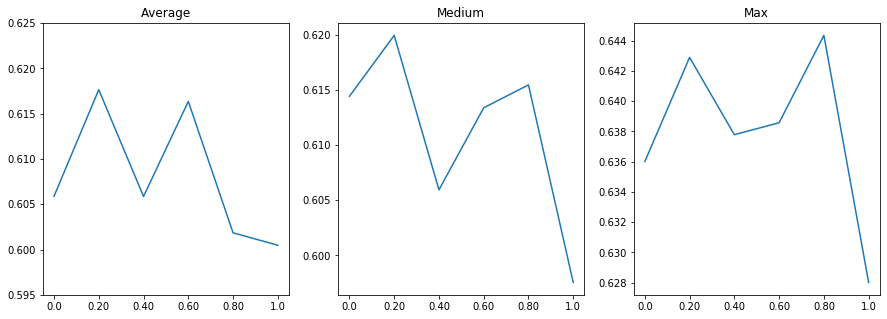

In [15]:
inputPath = 'result/summed_float_'
alpha = ['0.0', '0.20', '0.40',  '0.60', '0.80', '1.0']

avg = {x:0 for x in alpha}
med = {x:0 for x in alpha}
Max = {x:0 for x in alpha}
results = {x:[] for x in alpha}

for a in alpha:
    for x in range(10):
        path = os.path.expanduser(inputPath) + a + '_' + str(x) + '.txt'
        print(path)
        with open(path) as f:
            l = f.readlines()
            temp = l[-2].split()[-1]
            #print(float(temp))
            
            results[a].append(float(temp))
    print(results[a])
    results[a].sort()

for a in alpha:
    avg[a] = caluculateAVG(results[a])
    med[a] = outputMedium(results[a])
    Max[a] = outputMax(results[a])
    
print("avg : ", avg)
print("med : ", med)
print("max : ", Max)

avgList = []
medList = []
maxList = []
for a in alpha:
    avgList.append(avg[a])
    medList.append(med[a])
    maxList.append(Max[a])
    
print("Avg: ", avgList)
print("Med", medList)
print("Max", maxList)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].plot(alpha, avgList)
axes[0].set_title("Average")
axes[0].set_ylim([0.595, 0.625])
axes[1].plot(alpha, medList)
axes[1].set_title("Medium")
axes[2].plot(alpha, maxList)
axes[2].set_title("Max")
plt.show()

result/summed_hist_float_0.0_0.txt
result/summed_hist_float_0.0_1.txt
result/summed_hist_float_0.0_2.txt
result/summed_hist_float_0.0_3.txt
result/summed_hist_float_0.0_4.txt
result/summed_hist_float_0.0_5.txt
result/summed_hist_float_0.0_6.txt
result/summed_hist_float_0.0_7.txt
result/summed_hist_float_0.0_8.txt
result/summed_hist_float_0.0_9.txt
result/summed_hist_float_0.0_10.txt
result/summed_hist_float_0.0_11.txt
result/summed_hist_float_0.0_12.txt
result/summed_hist_float_0.0_13.txt
result/summed_hist_float_0.0_14.txt
result/summed_hist_float_0.0_15.txt
result/summed_hist_float_0.0_16.txt
result/summed_hist_float_0.0_17.txt
result/summed_hist_float_0.0_18.txt
result/summed_hist_float_0.0_19.txt
[0.5794961129701907, 0.6283209120975061, 0.6206312259282061, 0.6137019779687947, 0.6040149988569901, 0.6151083618728992, 0.5504307987547447, 0.5828676561108915, 0.6360077920113953, 0.6282182581545825, 0.6251740264126553, 0.6322614573561974, 0.622311792708681, 0.6474153614233923, 0.64183099

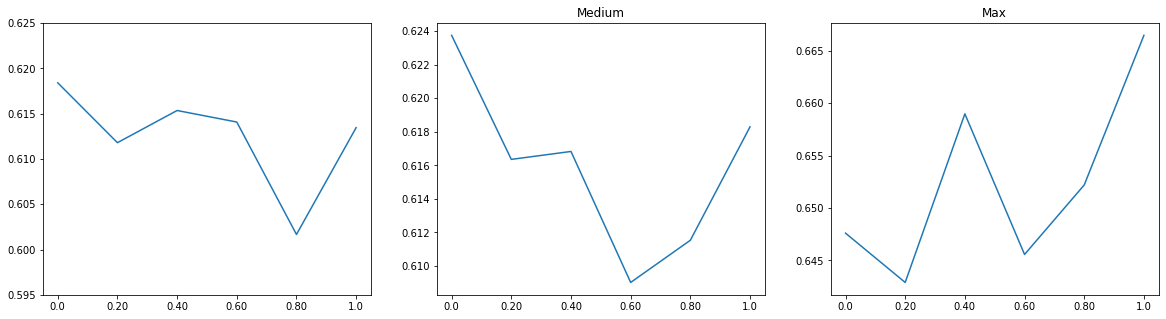

In [4]:
inputPath = 'result/summed_hist_float_'
alpha = ['0.0', '0.20', '0.40',  '0.60', '0.80', '1.0']

avg = {x:0 for x in alpha}
med = {x:0 for x in alpha}
Max = {x:0 for x in alpha}
results = {x:[] for x in alpha}

for a in alpha:
    for x in range(20):
        path = os.path.expanduser(inputPath) + a + '_' + str(x) + '.txt'
        print(path)
        with open(path) as f:
            l = f.readlines()
            temp = l[-2].split()[-1]
            #print(float(temp))
            
            results[a].append(float(temp))
    print(results[a])
    #results[a].sort()

for a in alpha:
    avg[a] = caluculateAVG(results[a])
    med[a] = outputMedium(results[a])
    Max[a] = outputMax(results[a])
    
print("avg : ", avg)
print("med : ", med)
print("max : ", Max)

avgList = []
medList = []
maxList = []
for a in alpha:
    avgList.append(avg[a])
    medList.append(med[a])
    maxList.append(Max[a])
    
print("Avg: ", avgList)
print("Med", medList)
print("Max", maxList)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].plot(alpha, avgList)
axes[0].set_ylim([0.595, 0.625])
axes[1].plot(alpha, medList)
axes[1].set_title("Medium")
axes[2].plot(alpha, maxList)
axes[2].set_title("Max")
plt.show()

In [5]:
import numpy as np

[0.023521373042513744, 0.023540525406498248, 0.02257246025763552, 0.019363660659240146, 0.033428088651431966, 0.021574312260472867]


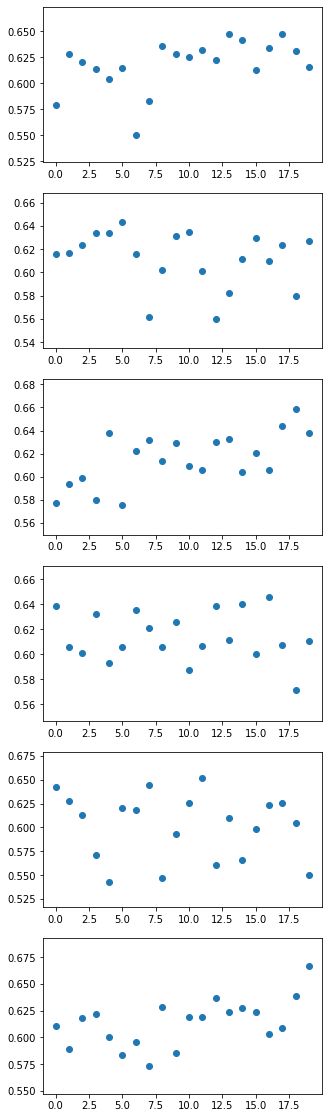

In [8]:
alpha = ["0.0", "0.20", "0.40", "0.60", "0.80", "1.0"]
fig, axes = plt.subplots(len(alpha), 1, figsize=(5, 20))
Var = []
for i, a in enumerate(alpha):

    axes[i].scatter(x = np.arange(20), y = results[a])
    Var.append(np.array(results[a]).var())
print([math.sqrt(v) for v in Var])

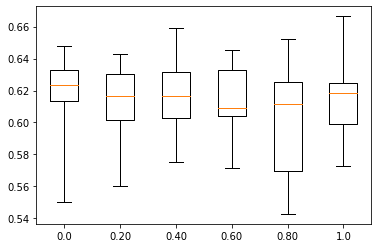

[0.023521373042513744, 0.023540525406498248, 0.02257246025763552, 0.019363660659240146, 0.033428088651431966, 0.021574312260472867]


In [9]:
#fig, axes = plt.subplots(1,2, figsize=(20,5))
box = []
alpha = ["0.0", "0.20", "0.40", "0.60", "0.80", "1.0"]
for a in alpha:
    box.append(results[a])
    
plt.boxplot(box, whis="range")
plt.xticks(np.arange(1,7), alpha)
plt.show()
print([math.sqrt(v) for v in Var])

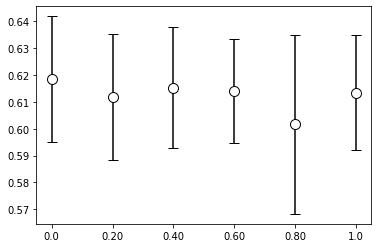

In [10]:
# y軸方向にのみerrorbarを表示
yError = [math.sqrt(v) for v in Var]
plt.errorbar(x=alpha, y=avgList, yerr = yError, fmt='o',capsize=5 , markersize=10, ecolor='black', markeredgecolor = "black", color='w')
plt.show()
#plt.plot(avgList, alpha=1)

# plt.savefig('y_error_bar.png

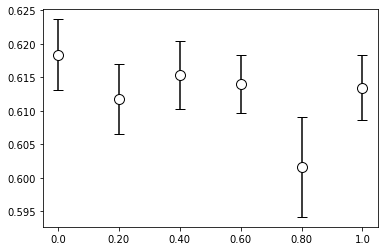

In [11]:
# y軸方向にのみerrorbarを表示
import math
yError = [math.sqrt(v) / math.sqrt(len(results["0.0"])) for v in Var]
plt.errorbar(x=alpha, y=avgList, yerr = yError, fmt='o', capsize=5 ,markersize=10, ecolor='black', markeredgecolor = "black", color='w')
plt.show()
#plt.plot(avgList, alpha=1)

# plt.savefig('y_error_bar.png